# CSC345 Coursework
## Katerina Nicolaou-Tiddy
## 913957

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # this is for normalising our data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import skimage.feature
import tensorflow.keras as keras
import tensorflow as tf
import sklearn.cluster as KM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import itertools
print(tf.__version__)
trnImages = np.load('trnImage.npy')
trnidx = 20

2.0.0


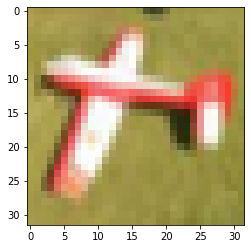

In [8]:
plt.imshow(trnImages[:,:,:,trnidx])

In [9]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

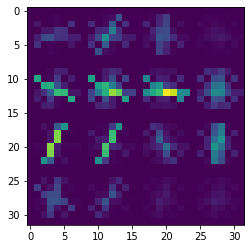

In [10]:
# Extract the features from a single image
features, hog_image = computeFeatures(trnImages[:,:,:,trnidx])

plt.imshow(hog_image)
plt.show(block=False)

Text(0.5, 1.0, 'Training and Testing Samples')

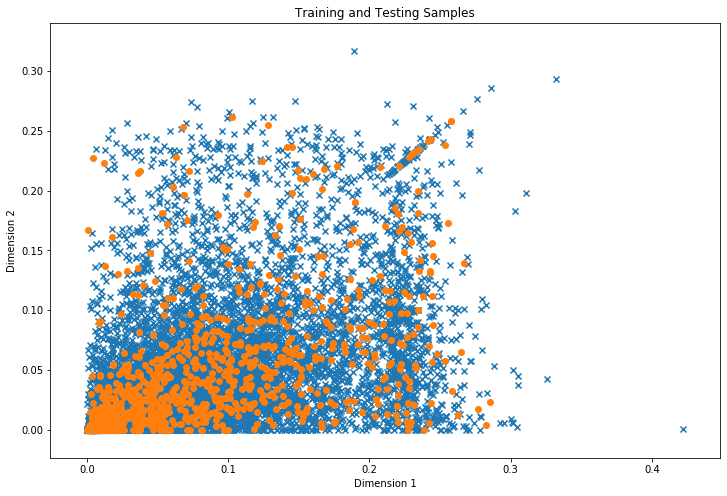

In [234]:
# Load test and training data
train_data = np.load("trnImage.npy")
train_labels = np.load("trnLabel.npy")

test_data = np.load("tstImage.npy")
test_labels = np.load("tstLabel.npy")

test_labels.ravel()
train_labels.ravel()

# Create empty array for features
trnFeatures = []
tstFeatures = []

# Iterate over amount of images append features to array
for i in range(0,10000):
    features, hog_image = computeFeatures(train_data[:,:,:,i])
    trnFeatures.append(features)
    
for i in range(0,1000):
    features, hog_image = computeFeatures(test_data[:,:,:,i])
    tstFeatures.append(features)

train_data = np.array(trnFeatures)
test_data = np.array(tstFeatures)

# Plot the training samples, then plot the testing samples over the top with different marker shapes
plt.figure(figsize=(12,8))
plt.scatter(train_data[:,0], train_data[:,1], marker = 'x')
plt.scatter(test_data[:,0], test_data[:,1], marker = 'o')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Training and Testing Samples')

# K-Means

Percentage accuracy on testing set is: 6.45%


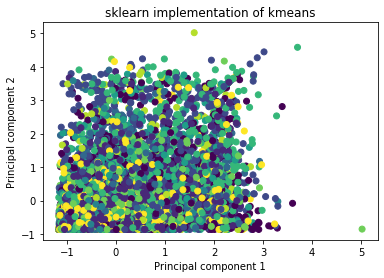

In [87]:
k = 10
kmeans = KM.KMeans(n_clusters = k)
kmeans.fit(train_data)
predicted_labels = kmeans.predict(train_data)

accuracy = accuracy_score(train_labels, predicted_labels) * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

plt.scatter(train_data[:,0], train_data[:,1], c = predicted_labels)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('sklearn implementation of kmeans')
plt.show(block=False)

# Principal Component Analysis

In [100]:
C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
kernel_type = 'linear' # This denotes the type of kernel used by our SVM (Lecture 8, slides 15/16)
model_linear = SVC(kernel="linear", C = C)
model_rbf = SVC(kernel="rbf", C = C)
model_poly = SVC(kernel="poly" , C = C)

# Fit the model to the dataset, given the binary labels.
model_linear.fit(train_data, train_labels.ravel())
model_rbf.fit(train_data, train_labels.ravel())
model_poly.fit(train_data, train_labels.ravel())

# Use the model to predict the class of the test observations.
linear_predicted_labels = model_linear.predict(test_data)
rbf_predicted_labels = model_rbf.predict(test_data)
poly_predicted_labels = model_poly.predict(test_data)

In [28]:
# Perform PCA on the training data
# Calculate the mean vector of the data.
mu = np.mean(train_data, axis = 0) 

# Mean-centre the training samples.
centred_train_data = train_data - mu 

U, S, Vt = np.linalg.svd(centred_train_data)

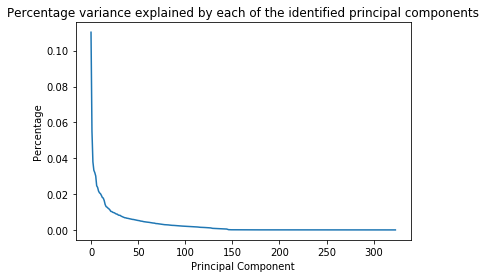

In [29]:
# Calculate the variance explained by each of the principal components. This may help you to select a number of
# principle components to keep
percentage_variance_explained = S**2 / np.sum(S**2)

# Plot the percentage variance explained by each of the principal component spaces
# TODO: Plot the percentage variance explained as calculated above.
# TODO: Give figure suitable axes labels and title.
plt.figure()
plt.plot(percentage_variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Percentage')
plt.title('Percentage variance explained by each of the identified principal components')
plt.show(block=False)

In [45]:
# Select the number of components to keep and create the projection matrix
n_components = 10 # Select a number of principal components to keep. Hint: Look at the figure above.
projection_matrix = Vt[0:n_components, :] # Slice into Vt to obtain projection matrix. Hint: Lecture 5, slide 22.

# Project the training data into the Principal Component space
projected_train_data = centred_train_data @ projection_matrix.T # Project the training data into the new PCA space. Hint: Lecture 5, slide 22.

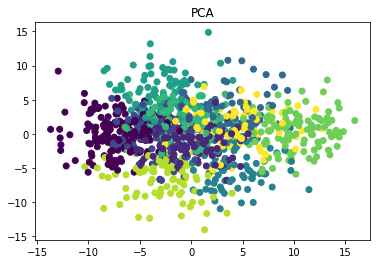

In [213]:
# Project the testing data into the Principal Component space
centred_test_data = test_data - mu # Mean-centre the testing data.

# Project the data into principal component space
projected_test_data = centred_test_data @ projection_matrix.T # Project the training data into the new PCA space.

# Plot the training and testing data projected in the new Principal Component space
predicted_train_labels = kmeans.predict(train_data)
predicted_test_labels = kmeans.predict(test_data)

pca = PCA(n_components = 10)
pca_train_data = pca.fit(projected_train_data).transform(projected_train_data)
pca_test_data = pca.fit(projected_test_data).transform(projected_test_data)

plt.scatter(pca_test_data[:, 0], pca_test_data[:, 1] , c = predicted_test_labels)
plt.title("PCA")
plt.show()

# Linear Discriminant Analysis

Percentage accuracy on testing set is: 6.3


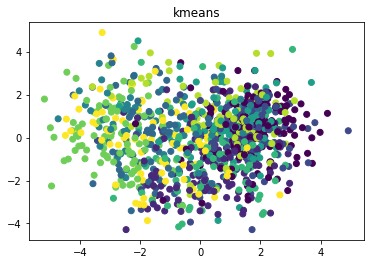

Percentage accuracy on testing set is: 48.5


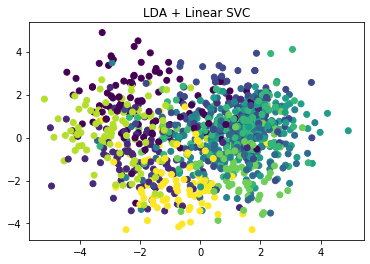

Percentage accuracy on testing set is: 60.0


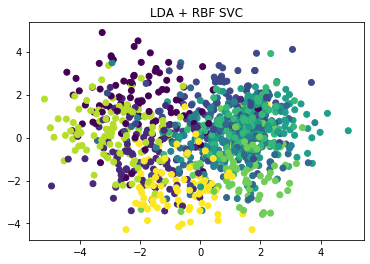

Percentage accuracy on testing set is: 55.900000000000006


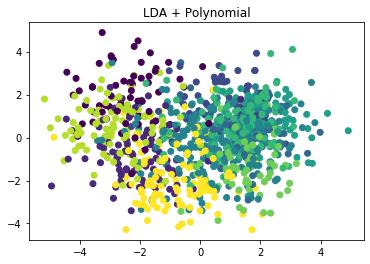

In [239]:
# Fit data to LDA
lda = LinearDiscriminantAnalysis(n_components=9)
lda_data = lda.fit(test_data, test_labels.ravel()).transform(test_data)

# Print accuracy and graph for K-Means with LDA
print('Percentage accuracy on testing set is: '+ str(accuracy_score(test_labels, predicted_test_labels)*100))
plt.scatter(lda_data[:, 0], lda_data[:, 1] , c = predicted_test_labels)
plt.title("kmeans")
plt.show()

# Print accuracy and graph for Linear SVC with LDA
print('Percentage accuracy on testing set is: '+ str(accuracy_score(test_labels, linear_predicted_labels)*100))
plt.scatter(lda_data[:, 0], lda_data[:, 1] , c = linear_predicted_labels)
plt.title("LDA + Linear SVC")
plt.show()

# Print accuracy and graph for RBF SVC with LDA
print('Percentage accuracy on testing set is: '+ str(accuracy_score(test_labels, rbf_predicted_labels)*100))
plt.scatter(lda_data[:, 0], lda_data[:, 1] , c = rbf_predicted_labels)
plt.title("LDA + RBF SVC")
plt.show()

# Print accuracy and graph for Polynomial SVC with LDA
print('Percentage accuracy on testing set is: '+ str(accuracy_score(test_labels, poly_predicted_labels)*100))
plt.scatter(lda_data[:, 0], lda_data[:, 1] , c = poly_predicted_labels)
plt.title("LDA + Polynomial")
plt.show()

# Neural Networks

In [229]:
# Load test and training data
train_data = np.load("trnImage.npy")
train_labels = np.load("trnLabel.npy")

test_data = np.load("tstImage.npy")
test_labels = np.load("tstLabel.npy")

# Create empty array for features
trnFeatures = []
tstFeatures = []

# Iterate over amount of images append features to array
for i in range(0,10000):
    features, hog_image = computeFeatures(train_data[:,:,:,i])
    trnFeatures.append(features)
    
for i in range(0,1000):
    features, hog_image = computeFeatures(test_data[:,:,:,i])
    tstFeatures.append(features)

train_data = np.array(trnFeatures)
test_data = np.array(tstFeatures)

test_labels.ravel()
train_labels.ravel()

# Normalise the data based on the training set
normaliser = StandardScaler().fit(train_data)
train_data = normaliser.transform(train_data)
test_data = normaliser.transform(test_data)

# Find out the number of classes in the dataset
number_of_classes = np.max(train_labels) + np.max(test_labels) + 1

In [230]:
# Build our network architecture by stacking layers in a Keras Sequential object.
model = keras.Sequential()

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
model.add(keras.layers.InputLayer(input_shape=(train_data.shape[1],)))

# Create hidden layers. Nodes = no. of features?
model.add(keras.layers.Dense(324, activation='sigmoid')) # first layer
model.add(keras.layers.Dense(324, activation='sigmoid')) # second layer

# Create output layer to get predicted class labels.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Fit our model to the data
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=200, verbose=0)

# Predict probabilities of classes for the testing set.
predicted_probabilities = model.predict(test_data)

# Use argmax to get the predicted class label
nn_predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = accuracy_score(test_labels, nn_predicted_labels) * 100
print('Percentage accuracy on testing set is: '+ str(accuracy_score(test_labels, nn_predicted_labels)*100))

Percentage accuracy on testing set is: 54.900000000000006


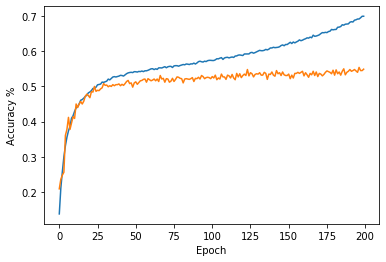

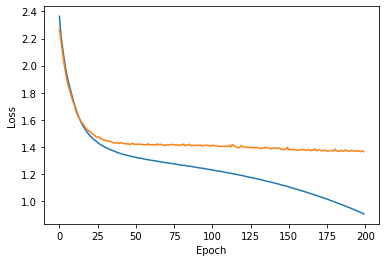

In [231]:
# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Confusion Matrix

In [226]:
# Plot confusion matrix method 
# PLEASE NOTE: This method was found on the scikit website 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# Method was slightly edited to fit the purpose but I am not claiming I wrote this method.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.61 0.03 0.07 0.02 0.04 0.   0.02 0.05 0.13 0.03]
 [0.04 0.54 0.02 0.05 0.04 0.02 0.07 0.02 0.1  0.1 ]
 [0.1  0.03 0.43 0.06 0.08 0.16 0.06 0.05 0.03 0.  ]
 [0.05 0.04 0.12 0.3  0.14 0.15 0.11 0.05 0.02 0.02]
 [0.03 0.02 0.16 0.08 0.47 0.07 0.1  0.01 0.03 0.03]
 [0.01 0.02 0.16 0.15 0.07 0.4  0.1  0.08 0.   0.01]
 [0.04 0.04 0.07 0.12 0.09 0.1  0.49 0.03 0.   0.02]
 [0.01 0.03 0.08 0.13 0.14 0.05 0.04 0.48 0.01 0.03]
 [0.19 0.12 0.03 0.02 0.01 0.   0.03 0.01 0.55 0.04]
 [0.04 0.09 0.03 0.01 0.04 0.03 0.   0.06 0.12 0.58]]
Normalized confusion matrix
[[0.69 0.02 0.06 0.02 0.04 0.01 0.02 0.04 0.09 0.01]
 [0.04 0.64 0.   0.02 0.04 0.01 0.03 0.03 0.11 0.08]
 [0.06 0.01 0.5  0.06 0.06 0.15 0.08 0.04 0.02 0.02]
 [0.02 0.03 0.14 0.42 0.11 0.11 0.09 0.04 0.01 0.03]
 [0.04 0.02 0.07 0.13 0.63 0.04 0.05 0.   0.02 0.  ]
 [0.01 0.01 0.06 0.09 0.09 0.58 0.07 0.07 0.01 0.01]
 [0.02 0.04 0.07 0.07 0.08 0.08 0.62 0.01 0.01 0.  ]
 [0.02 0.   0.06 0.09 0.11 0.08 0.03 0.57 

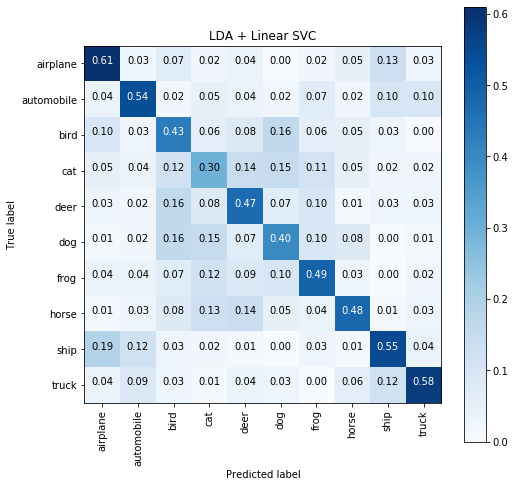

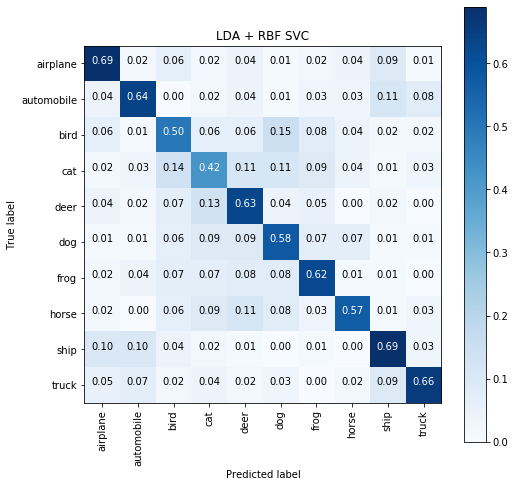

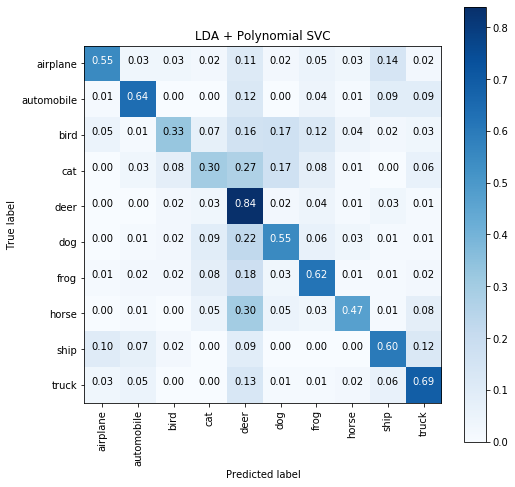

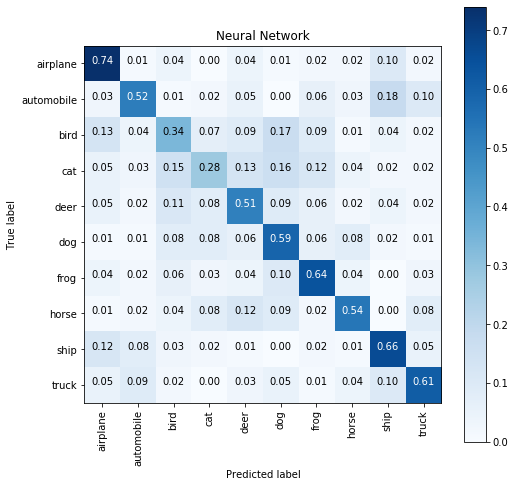

In [227]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Object classes
n = "true" # Normalised?

# CM titles
title_poly="LDA + Polynomial SVC"
title_rbf="LDA + RBF SVC"
title_linear="LDA + Linear SVC"
title_nn="Neural Network"

# CM theme
cmap = plt.cm.Blues

# Different CMs generated
cm_linear = confusion_matrix(test_labels, linear_predicted_labels)
cm_rbf = confusion_matrix(test_labels, rbf_predicted_labels)
cm_poly = confusion_matrix(test_labels, poly_predicted_labels)
cm_nn = confusion_matrix(test_labels, nn_predicted_labels)

# Plotting CMs
plot_confusion_matrix(cm_linear, classes, n, title_linear, cmap)
plot_confusion_matrix(cm_rbf, classes, n, title_rbf, cmap)
plot_confusion_matrix(cm_poly, classes, n, title_poly, cmap)
plot_confusion_matrix(cm_nn, classes, n, title_nn, cmap)